![](pics/header.jpg)

# April Tags

Kevin J. Walchko, Phd

10 Apr 2020

---

![](pics/tags.png)

There are many types of tags out there with various benefits and detractors. Here we are focusing on Apriltags.

![](pics/apriltag_bits.png)

Like a QR code, there is a bit pattern within the Apriltag that encodes information. Unlike QR codes, that can be of a various sizes and complexity, Apriltags are designed to encode only a limited set of numbers for robotic or VR type applications. The tag used here is the `tag16h5` which is an 6x6 pattern.

![](pics/tags.gif)

The AprilTag package has several tag `families`, that are characterised by two numbers; the number of data bits in a square, and the hamming distance between adjacent tags, e.g. 16h5 is a 4-by-4 data square, with a hamming distance of 5. The hamming distance is used to remove similar-looking tags that might easily be confused for each other, including rotations, so although 16h5 has 16 data bits, there are only 30 unique tags in that family.

![](pics/apriltags_all.png)

There have been many versions of Apriltags, with version 3 being the current version at the time of this writing. Here, advances have allowed increased detection range for version 3 over previous versions.

![](pics/apriltags.jpg)

In addition to black and white tags to encode information, there are some tags that use color like chromotags. Here the different colors increase the number of available bits.

<img src="pics/method.png" width="30%"/>

## Library

Apriltag is written in C++, but there are python wrappers for it. The one used here is [`pupil_apriltags`](https://github.com/pupil-labs/apriltags) which seems to be complete and is MIT licensed.

# Targets

![](pics/apriltag-pad.jpg)

## DiBond Aluminum Tag

For very sturdy tags, consider having them printed on DiBond aluminum, a material used for making advertisement signs. The company [FoamCorePrint.com](https://www.foamcoreprint.com/) has been used for this before. Make sure to select 1/4” thick material (the 1/8” boards only come glossy, not matte), and specify explicitly that you want it matte, and no rescaling of the image. You must supply them with a pdf that exactly fills the size of the board. For a 12”x12” board, the cost is currently about $15 without shipping. The material is quite heavy, so not easily attached to walls with duct tape. However, it’s very rugged and weather resistant, i.e. suitable for permanent installation outdoors.

DiBond is also great material for a calibration board that gets heavy use. Due to popular demand, here are links to the front and back of the calibration board in the image. You can use them directly for printing on 1/4”x16”x12” DiBond at FoamCorePrint.com.

You can also laser print the tag on an label like [this](https://www.onlinelabels.com/products/OL177CX) and adhere it to some foam board.

TagSlam: [Making and Using AprilTags](https://berndpfrommer.github.io/tagslam_web/making_tags/)

## References

- [April Robotics Lab](https://april.eecs.umich.edu/software/apriltag.html)
- [AprilTag: A robust and flexible visual fiducial system](https://april.eecs.umich.edu/papers/details.php?name=olson2011tags)
- isof blog: [Raspberry Pi position detection using fiducial tags](https://iosoft.blog/2019/09/02/raspberry-pi-position-detection-fiducial-tags/)
- [visual servoing](https://visp-doc.inria.fr/doxygen/visp-daily/tutorial-detection-apriltag.html)
- [Chromatags](https://austingwalters.com/chromatags/)
    - [Github: Chromatags](https://github.com/lettergram/chromatag)
- [Apriltags vs Aruco Markers](https://robotics.stackexchange.com/questions/19901/apriltag-vs-aruco-markers)

## Repos

- [AprilRobotics C/C++](https://github.com/AprilRobotics/apriltag)
- [AprilRobotics Apriltag pre-rendered images](https://github.com/AprilRobotics/apriltag-imgs)
- [pupil-labs python code](https://github.com/pupil-labs/apriltags)
- [duckietown python code](https://github.com/duckietown/dt-apriltags)
- [swatobics python code](https://github.com/swatbotics/apriltag)
- [Apriltag Tracking](https://github.com/pfrommerd/tag-tracking-matlab)

## Other Examples

- [Pose estimation](https://github.com/AprilRobotics/apriltag/issues/63)
- [C++ example](https://visp-doc.inria.fr/doxygen/visp-3.1.0/tutorial-detection-apriltag.html)
- [Draw cube on tag](https://stackoverflow.com/questions/59044973/how-do-i-draw-a-line-indicating-the-orientation-of-an-apriltag)
- [Draw chessboard pose](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_pose/py_pose.html)
- [Vehicle distance w/apriltag](https://elib.dlr.de/116211/1/Masterarbeit_PatrickIrmisch.pdf)

## PDFs

- [local](article-pdf)

In [1]:
from pupil_apriltags import Detector
from pprint import pprint

import yaml
import os
import slurm
from slurm import storage

import imageio

In [2]:
import numpy as np
np.set_printoptions(precision=1)
np.set_printoptions(suppress=True)

from matplotlib import pyplot as plt
import cv2
import attr
from opencv_camera import ApriltagMarker

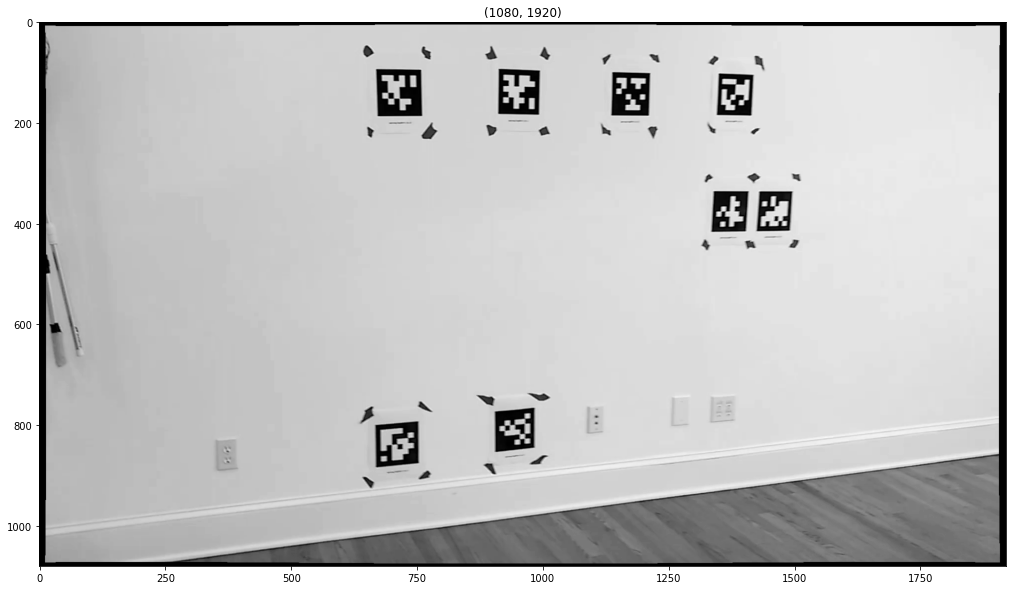

In [3]:
img = cv2.imread("pics/0001.png",0)

plt.subplots(1,1,figsize=(20,10))
plt.imshow(img, cmap="gray")
plt.title(f"{img.shape}");

In [4]:
# detector.nThreads = 4,        Number of threads to use
# detector.quad_decimate = 1.0, Decimate input image by this factor
# detector.quad_sigma = 0.0,    Apply low-pass blur to input; negative sharpens
# detector.refine_edges = 1,    Set to 1 to spend more time to align edges of tags
# detector.refine_decode = 0,   Set to 1 to spend more time to decode tags
# detector.refine_pose = 0,     Set to 1 to spend more time to precisely localize tags
d = Detector(families='tag36h11',
        nthreads=1,
        quad_decimate=1.0,
        quad_sigma=0.0,
        refine_edges=1,
        decode_sharpening=0.25,
        debug=0)

# you can find the parameters inside the detector
d.params

{'families': ['tag36h11'],
 'nthreads': 1,
 'quad_decimate': 1.0,
 'quad_sigma': 0.0,
 'refine_edges': 1,
 'decode_sharpening': 0.25,
 'debug': 0}

In [5]:
tags = d.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
print(f"{len(tags)} {tags[0].tag_family.decode('utf8')} tags found")

8 tag36h11 tags found


In [6]:
# Let's only do a couple of tags
for t in tags[:3]:
    print("-"*40)
    print(t)

----------------------------------------
Detection object:
tag_family = b'tag36h11'
tag_id = 0
hamming = 0
decision_margin = 72.41937255859375
homography = [[ 50.865   4.656 715.824]
 [  1.53   47.014 140.766]
 [  0.01    0.005   1.   ]]
center = [715.824 140.766]
corners = [[672.848 187.149]
 [760.348 186.611]
 [758.39   94.827]
 [669.994  93.576]]
pose_R = None
pose_t = None
pose_err = None

----------------------------------------
Detection object:
tag_family = b'tag36h11'
tag_id = 1
hamming = 0
decision_margin = 75.35541534423828
homography = [[ 50.048   2.141 953.401]
 [  2.687  44.619 139.088]
 [  0.01    0.003   1.   ]]
center = [953.401 139.088]
corners = [[912.184 182.357]
 [992.379 183.945]
 [994.018  96.449]
 [913.372  93.02 ]]
pose_R = None
pose_t = None
pose_err = None

----------------------------------------
Detection object:
tag_family = b'tag36h11'
tag_id = 2
hamming = 0
decision_margin = 76.803955078125
homography = [[  47.208    1.554 1175.227]
 [   1.885   42.891  1

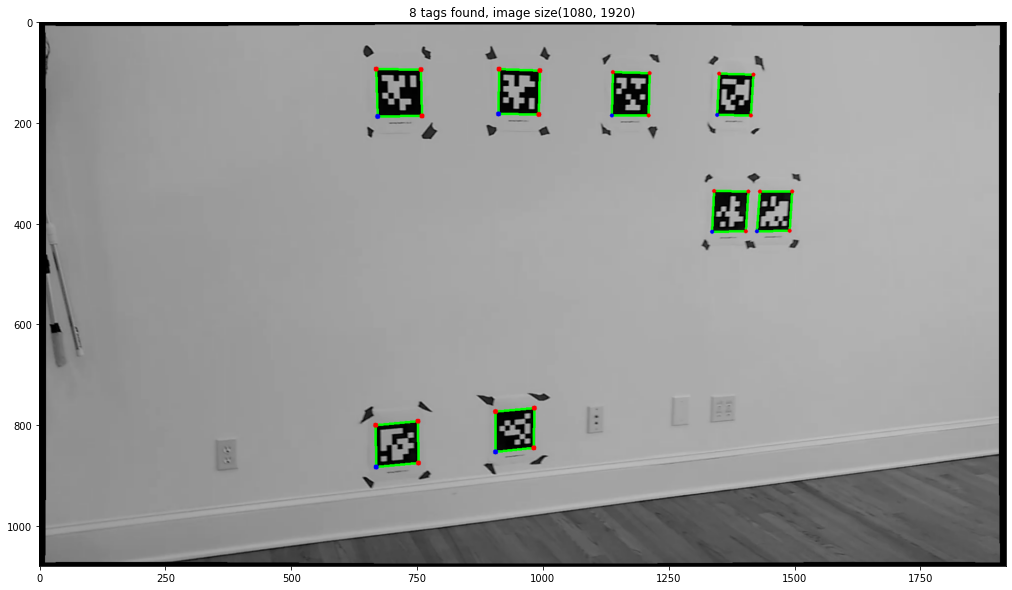

In [7]:
img2 = img.copy()

tm = ApriltagMarker()
im = tm.draw(img2, tags)

plt.subplots(1,1,figsize=(20,10))
plt.imshow(im)
plt.title(f"{len(tags)} tags found, image size{img2.shape}");

# Scale Tag

This might sound dumb, but if you don't scale correctly, you will end up with a blurry tag. If using OpenCV, then the best option is to use `cv2.INTER_AREA` for the interpolation. It produces nice crisp results.

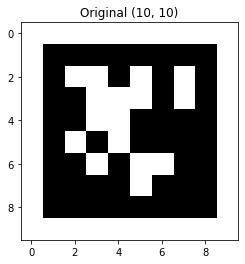

In [8]:
def scale(im, s=1.0):
    (h,w) = im.shape
    return cv2.resize(im, (s*h, s*w,), interpolation=cv2.INTER_AREA)

im = cv2.imread("pics/tag36_11_00000.png",0)
plt.imshow(im, cmap='gray')
plt.title(f"Original {im.shape}");

[Detection object:
tag_family = b'tag36h11'
tag_id = 0
hamming = 0
decision_margin = 120.0
homography = [[200.192  -0.023 250.046]
 [  0.027 199.972 249.873]
 [  0.     -0.      1.   ]]
center = [250.046 249.873]
corners = [[ 49.875 450.209]
 [450.209 449.866]
 [449.869  49.885]
 [ 49.878  49.875]]
pose_R = None
pose_t = None
pose_err = None
]


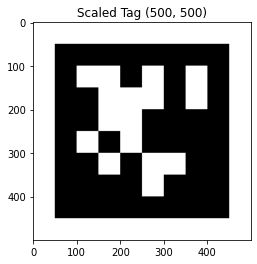

In [9]:
rim = scale(im, 50)
plt.imshow(rim, cmap='gray')
plt.title(f"Scaled Tag {rim.shape}");
tags = d.detect(rim, estimate_tag_pose=False, camera_params=None, tag_size=None)
print(tags)